# Homework 7
## Katie Heath

Homework 7
Practice training a deep neural network on the CIFAR10 image dataset:

Visualize 20 examples of CIFAR. You can load it with keras.datasets.cifar10.load_data(). The dataset is composed of 60,000 32 × 32–pixel color images (50,000 for training, 10,000 for testing) with 10 classes.

Build a DNN with 20 hidden layers of 100 neurons each (that’s too many, but it’s the point of this exercise). Use He initialization and the ELU activation function. (use a for loop for making layers!!)

Using Adam optimization and early stopping, train the network on the CIFAR10 dataset. You’ll need a softmax output layer with 10 neurons. Remember to search for the right learning rate each time you change the model’s architecture or hyperparameters.

Now try adding Batch Normalization and compare the learning curves: Is it converging faster than before? Does it produce a better model? How does it affect training speed?

Try replacing Batch Normalization with SELU, and make the necessary adjustments to ensure the network self-normalizes (i.e., standardize the input features, use LeCun normal initialization, make sure the DNN contains only a sequence of dense layers, etc.)

Paste a link to your Ipython notebook. Make sure all the images are visible and that there are no errors when clicking on the link.

In [1]:
import pandas as pandas
import tensorflow as tf
from tensorflow import keras
#assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
#Load Data

cifar_data = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = cifar_data.load_data()


In [3]:
#Split Test and Train data

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

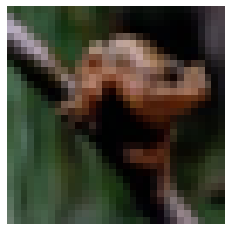

In [4]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [5]:
print(y_train[0])

class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer",
               "Dog", "Frog", "Horse", "Ship", "Truck"]

print(class_names[int(y_train[0])])

[6]
Frog


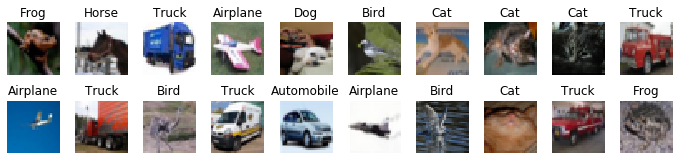

In [6]:
n_rows = 2
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[int(y_train[index])], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [7]:
##
# Check if keras can run on the GPU
#

from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4181411751110765605
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2210712780
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3015401395912949771
physical_device_desc: "device: 0, name: GeForce GTX 1060 3GB, pci bus id: 0000:2d:00.0, compute capability: 6.1"
]


In [17]:
##
# Create a model to learn the CIFAR classes
# Use Adam optimizer, elu activation, he_normal initializer

from tensorflow import keras
from tensorflow.keras.optimizers import Adam

## Function to create a model
def build_model(learning_rate=0.001, layer_size=100, hidden_layers=20, beta_1=0.9, beta_2=0.999):
    # Define the model
    model = keras.models.Sequential()

    # Add a layer to flatten the input picture
    model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))

    # Add hidden layers
    for i in range(hidden_layers):
        model.add(keras.layers.Dense(layer_size, activation="elu", kernel_initializer="he_normal")) 

    # Add a final layer to pick the output
    model.add(keras.layers.Dense(10, activation="softmax"))

    # Compile the model
    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=Adam(
            learning_rate=learning_rate,
            beta_1=beta_1,
            beta_2=beta_2,
            amsgrad=True
        ),
        metrics=["accuracy"]
    )

    # All done!
    return model

## Use that badass function
model = build_model(
    learning_rate=0.006,
    layer_size=100,
    hidden_layers=20,
    beta_1=0.9,
    beta_2=0.9
)

In [18]:
##
# Train with early stopping
#

from tensorflow.keras.callbacks import EarlyStopping

## Define the callbacks to use
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
]

## Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_data=(X_valid, y_valid),
    callbacks=callbacks
)

Train on 45000 samples, validate on 5000 samples
Epoch 1/50
45000/45000 [==============================] - 11s 239us/sample - loss: 2.2348 - accuracy: 0.2072 - val_loss: 1.9493 - val_accuracy: 0.2602
Epoch 2/50
45000/45000 [==============================] - 9s 206us/sample - loss: 1.9112 - accuracy: 0.2884 - val_loss: 1.8708 - val_accuracy: 0.3198
Epoch 3/50
45000/45000 [==============================] - 9s 204us/sample - loss: 1.8425 - accuracy: 0.3196 - val_loss: 1.8768 - val_accuracy: 0.3146
Epoch 4/50
45000/45000 [==============================] - 9s 206us/sample - loss: 1.7983 - accuracy: 0.3405 - val_loss: 1.8047 - val_accuracy: 0.3296
Epoch 5/50
45000/45000 [==============================] - 9s 204us/sample - loss: 1.7666 - accuracy: 0.3574 - val_loss: 1.7771 - val_accuracy: 0.3508
Epoch 6/50
45000/45000 [==============================] - 9s 202us/sample - loss: 1.7308 - accuracy: 0.3706 - val_loss: 1.6863 - val_accuracy: 0.3792
Epoch 7/50
45000/45000 [==========================

In [19]:
##
# Evaluate the model on the test set
#

mse_test = model.evaluate(X_test, y_test)

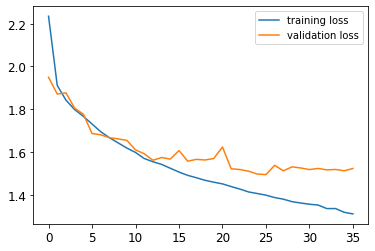

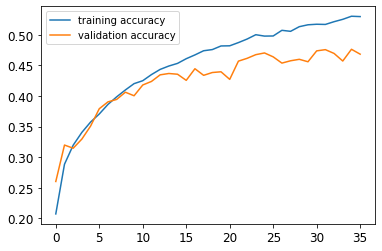

In [20]:
##
# Visualize the results
#

import matplotlib.pyplot as plt

## Plot loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss', 'validation loss'])

## Plot accuracy
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training accuracy', 'validation accuracy'])

In [9]:
##
# Tune the model's hyperparameters
#

from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

## Hyperparameter distributions
param_distribs = {
    "learning_rate": reciprocal(3e-4, 3e-2),
    #"layer_size": [60, 80, 100, 120],
    #"hidden_layers": [15, 20, 25],
    "beta_1": [0.9, 0.99, 0.999],
    "beta_2": [0.9, 0.99, 0.999]
}

## Define hyperparameter tuner
tuner = RandomizedSearchCV(
    KerasClassifier(build_model),
    param_distribs,
    n_iter=3,
    cv=3,
    verbose=2
)

## Tune the hyperparameters
tuner.fit(
    X_train,
    y_train,
    epochs=50,
    validation_data=(X_valid, y_valid),
    callbacks=[
        keras.callbacks.EarlyStopping(patience=10)
    ]
)

[CV]  beta_1=0.999, beta_2=0.999, learning_rate=0.0003920021771415983, total= 4.1min
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 34.6min finished
Train on 45000 samples, validate on 5000 samples
Epoch 1/50
45000/45000 [==============================] - 10s 229us/sample - loss: 1.9871 - accuracy: 0.2679 - val_loss: 1.8339 - val_accuracy: 0.3282
Epoch 2/50
45000/45000 [==============================] - 9s 194us/sample - loss: 1.7838 - accuracy: 0.3538 - val_loss: 1.7051 - val_accuracy: 0.3752
Epoch 3/50
45000/45000 [==============================] - 9s 192us/sample - loss: 1.7065 - accuracy: 0.3858 - val_loss: 1.6547 - val_accuracy: 0.4000
Epoch 4/50
45000/45000 [==============================] - 9s 194us/sample - loss: 1.6502 - accuracy: 0.4056 - val_loss: 1.6198 - val_accuracy: 0.4212
Epoch 5/50
45000/45000 [==============================] - 9s 195us/sample - loss: 1.6067 - accuracy: 0.4223 - val_loss: 1.6087 - val_accuracy: 0.4178
Epoch 6/50
45000/45000 [=====================

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000024C2126FB48>,
                   iid='warn', n_iter=3, n_jobs=None,
                   param_distributions={'beta_1': [0.9, 0.99, 0.999],
                                        'beta_2': [0.9, 0.99, 0.999],
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024C227ABCC8>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [16]:
##
# Print out the best parameters
#

print("Best params:")
print(tuner.best_params_)

print("Best score: " + str(tuner.best_score_))

# tuner.best_estimator_

Best params:
{'beta_1': 0.9, 'beta_2': 0.9, 'learning_rate': 0.0006154014789262348}
Best score: 0.45826666553815204


In [18]:
##
# Create a model to learn the CIFAR classes using batch normalization
#

from tensorflow import keras
from tensorflow.keras.optimizers import Adam

## Function to create a model
def build_model(learning_rate=0.006, layer_size=100, hidden_layers=20, beta_1=0.9, beta_2=0.9):
    # Define the model
    model = keras.models.Sequential()

    # Add a layer to flatten the input picture
    model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))


    # Add hidden layers
    for i in range(hidden_layers):
        model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.Dense(layer_size, activation="elu", kernel_initializer="he_normal")) 

    # Add a final layer to pick the output
    model.add(keras.layers.Dense(10, activation="softmax"))

    # Compile the model
    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=Adam(
            learning_rate=learning_rate,
            beta_1=beta_1,
            beta_2=beta_2,
            amsgrad=True
        ),
        metrics=["accuracy"]
    )

    # All done!
    return model

## Use that badass function
model = build_model(
    learning_rate=0.008731907739399206,
    layer_size=100,
    hidden_layers=10,
    beta_1=0.9,
    beta_2=0.9
)

In [19]:
##
# Train with early stopping
#

from tensorflow.keras.callbacks import EarlyStopping

## Define the callbacks to use
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
]

## Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_data=(X_valid, y_valid),
    callbacks=callbacks
)

Train on 45000 samples, validate on 5000 samples
Epoch 1/50
45000/45000 [==============================] - 22s 491us/sample - loss: 1.8627 - accuracy: 0.3318 - val_loss: 1.6816 - val_accuracy: 0.3960
Epoch 2/50
45000/45000 [==============================] - 18s 395us/sample - loss: 1.6809 - accuracy: 0.3996 - val_loss: 1.5826 - val_accuracy: 0.4384
Epoch 3/50
45000/45000 [==============================] - 17s 382us/sample - loss: 1.5969 - accuracy: 0.4315 - val_loss: 1.5527 - val_accuracy: 0.4462
Epoch 4/50
45000/45000 [==============================] - 17s 380us/sample - loss: 1.5423 - accuracy: 0.4496 - val_loss: 1.4705 - val_accuracy: 0.4766
Epoch 5/50
45000/45000 [==============================] - 17s 385us/sample - loss: 1.4983 - accuracy: 0.4645 - val_loss: 1.4449 - val_accuracy: 0.4860
Epoch 6/50
45000/45000 [==============================] - 17s 384us/sample - loss: 1.4622 - accuracy: 0.4806 - val_loss: 1.4376 - val_accuracy: 0.4918
Epoch 7/50
45000/45000 [=====================

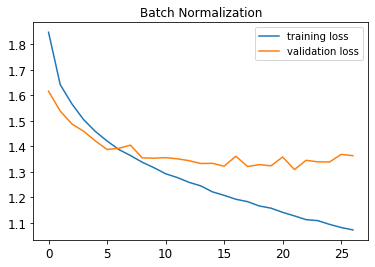

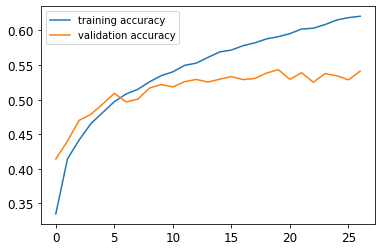

In [10]:
##
# Visualize the results for batch normalization
#

import matplotlib.pyplot as plt

## Plot loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss', 'validation loss'])
plt.title('Batch Normalization')

## Plot accuracy
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training accuracy', 'validation accuracy'])

# By adding batch normalization, the model converged in fewer epochs than before. It also improved validation accuracy and validation loss. 
# It increased the training time per epoch by almost 4 times and the overall time was greater. 

In [16]:
##
# Tune the model's hyperparameters
# Just tune learning_rate

from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

## Hyperparameter distributions
param_distribs = {
    "learning_rate": reciprocal(3e-4, 3e-2),
    #"layer_size": [60, 80, 100, 120],
    #"hidden_layers": [15, 20, 25],
    #"beta_1": [0.9, 0.99, 0.999],
    #"beta_2": [0.9, 0.99, 0.999]
}

## Define hyperparameter tuner
tuner = RandomizedSearchCV(
    KerasClassifier(build_model),
    param_distribs,
    n_iter=2,
    cv=2,
    verbose=2
)

## Tune the hyperparameters
tuner.fit(
    X_train,
    y_train,
    epochs=50,
    validation_data=(X_valid, y_valid),
    callbacks=[
        keras.callbacks.EarlyStopping(patience=5)
    ]
)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] learning_rate=0.008731907739399206 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train on 22500 samples, validate on 5000 samples
Epoch 1/50
22500/22500 [==============================] - 24s 1ms/sample - loss: 2.0685 - accuracy: 0.2513 - val_loss: 1.8987 - val_accuracy: 0.3046
Epoch 2/50
22500/22500 [==============================] - 16s 722us/sample - loss: 1.8837 - accuracy: 0.3149 - val_loss: 1.7840 - val_accuracy: 0.3430
Epoch 3/50
22500/22500 [==============================] - 16s 724us/sample - loss: 1.8068 - accuracy: 0.3463 - val_loss: 1.7167 - val_accuracy: 0.3846
Epoch 4/50
22500/22500 [==============================] - 16s 721us/sample - loss: 1.7526 - accuracy: 0.3676 - val_loss: 1.7303 - val_accuracy: 0.3732
Epoch 5/50
22500/22500 [==============================] - 16s 720us/sample - loss: 1.6987 - accuracy: 0.3885 - val_loss: 1.6302 - val_accuracy: 0.4086
Epoch 6/50
22500/22500 [==============================] - 16s 725us/sample - loss: 1.6660 - accuracy: 0.4036 - val_loss: 1.6418 - val_accuracy: 0.4128
Epoch 7/50
22500/22500 [=======================

[CV] ............... learning_rate=0.008731907739399206, total= 6.8min
[CV] learning_rate=0.008731907739399206 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.8min remaining:    0.0s


Train on 22500 samples, validate on 5000 samples
Epoch 1/50
22500/22500 [==============================] - 24s 1ms/sample - loss: 2.0464 - accuracy: 0.2611 - val_loss: 1.8647 - val_accuracy: 0.3222
Epoch 2/50
22500/22500 [==============================] - 16s 702us/sample - loss: 1.8624 - accuracy: 0.3252 - val_loss: 1.7538 - val_accuracy: 0.3728
Epoch 3/50
22500/22500 [==============================] - 16s 691us/sample - loss: 1.7803 - accuracy: 0.3544 - val_loss: 1.7653 - val_accuracy: 0.3706
Epoch 4/50
22500/22500 [==============================] - 15s 687us/sample - loss: 1.7355 - accuracy: 0.3741 - val_loss: 1.6492 - val_accuracy: 0.4030
Epoch 5/50
22500/22500 [==============================] - 16s 698us/sample - loss: 1.6969 - accuracy: 0.3886 - val_loss: 1.6176 - val_accuracy: 0.4106
Epoch 6/50
22500/22500 [==============================] - 16s 714us/sample - loss: 1.6571 - accuracy: 0.4096 - val_loss: 1.6207 - val_accuracy: 0.4204
Epoch 7/50
22500/22500 [=======================

[CV] ............... learning_rate=0.008731907739399206, total= 7.4min
[CV] learning_rate=0.004725396149933917 ..............................
Train on 22500 samples, validate on 5000 samples
Epoch 1/50
22500/22500 [==============================] - 26s 1ms/sample - loss: 2.0587 - accuracy: 0.2576 - val_loss: 1.8496 - val_accuracy: 0.3208
Epoch 2/50
22500/22500 [==============================] - 17s 738us/sample - loss: 1.8514 - accuracy: 0.3247 - val_loss: 1.7372 - val_accuracy: 0.3724
Epoch 3/50
22500/22500 [==============================] - 17s 751us/sample - loss: 1.7689 - accuracy: 0.3597 - val_loss: 1.6724 - val_accuracy: 0.3934
Epoch 4/50
22500/22500 [==============================] - 17s 751us/sample - loss: 1.7065 - accuracy: 0.3832 - val_loss: 1.6589 - val_accuracy: 0.3976
Epoch 5/50
22500/22500 [==============================] - 17s 777us/sample - loss: 1.6627 - accuracy: 0.4030 - val_loss: 1.6060 - val_accuracy: 0.4256
Epoch 6/50
22500/22500 [==============================] 

[CV] ............... learning_rate=0.004725396149933917, total= 4.5min
[CV] learning_rate=0.004725396149933917 ..............................
Train on 22500 samples, validate on 5000 samples
Epoch 1/50
22500/22500 [==============================] - 25s 1ms/sample - loss: 2.0401 - accuracy: 0.2636 - val_loss: 1.8731 - val_accuracy: 0.3242
Epoch 2/50
22500/22500 [==============================] - 17s 736us/sample - loss: 1.8379 - accuracy: 0.3352 - val_loss: 1.7258 - val_accuracy: 0.3746
Epoch 3/50
22500/22500 [==============================] - 16s 728us/sample - loss: 1.7618 - accuracy: 0.3649 - val_loss: 1.6749 - val_accuracy: 0.3978
Epoch 4/50
22500/22500 [==============================] - 16s 733us/sample - loss: 1.6971 - accuracy: 0.3852 - val_loss: 1.6580 - val_accuracy: 0.4062
Epoch 5/50
22500/22500 [==============================] - 16s 727us/sample - loss: 1.6564 - accuracy: 0.4020 - val_loss: 1.5938 - val_accuracy: 0.4222
Epoch 6/50
22500/22500 [==============================] 

[CV] ............... learning_rate=0.004725396149933917, total= 7.6min


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 26.3min finished


Train on 45000 samples, validate on 5000 samples
Epoch 1/50
45000/45000 [==============================] - 40s 894us/sample - loss: 1.9690 - accuracy: 0.2861 - val_loss: 1.7701 - val_accuracy: 0.3632
Epoch 2/50
45000/45000 [==============================] - 32s 708us/sample - loss: 1.7760 - accuracy: 0.3594 - val_loss: 1.6570 - val_accuracy: 0.3924
Epoch 3/50
45000/45000 [==============================] - 32s 709us/sample - loss: 1.6913 - accuracy: 0.3961 - val_loss: 1.6070 - val_accuracy: 0.4228
Epoch 4/50
45000/45000 [==============================] - 32s 705us/sample - loss: 1.6388 - accuracy: 0.4129 - val_loss: 1.5315 - val_accuracy: 0.4534
Epoch 5/50
45000/45000 [==============================] - 32s 720us/sample - loss: 1.5928 - accuracy: 0.4337 - val_loss: 1.5037 - val_accuracy: 0.4542
Epoch 6/50
45000/45000 [==============================] - 32s 718us/sample - loss: 1.5505 - accuracy: 0.4491 - val_loss: 1.5080 - val_accuracy: 0.4634
Epoch 7/50
45000/45000 [=====================

RandomizedSearchCV(cv=2, error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000018E28F97648>,
                   iid='warn', n_iter=2, n_jobs=None,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018E28F97C48>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [17]:
##
# Print out the best parameters
#

print("Best params:")
print(tuner.best_params_)

print("Best score: " + str(tuner.best_score_))

# tuner.best_estimator_


Best params:
{'learning_rate': 0.008731907739399206}
Best score: 0.4793333411216736


In [11]:
##
# Create a model to learn the CIFAR classes using SELU
#

from tensorflow import keras
from tensorflow.keras.optimizers import Adam

## Function to create a model
def build_model(learning_rate=0.006, layer_size=100, hidden_layers=20, beta_1=0.9, beta_2=0.9):
    # Define the model
    model = keras.models.Sequential()

    # Add a layer to flatten the input picture
    model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))


    # Add hidden layers
    for i in range(hidden_layers):
        model.add(keras.layers.Dense(layer_size, activation="selu", kernel_initializer="lecun_normal")) 

    # Add a final layer to pick the output
    model.add(keras.layers.Dense(10, activation="softmax"))

    # Compile the model
    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=Adam(
            learning_rate=learning_rate,
            beta_1=beta_1,
            beta_2=beta_2,
            amsgrad=True
        ),
        metrics=["accuracy"]
    )

    # All done!
    return model

## Use that badass function
model = build_model(
    learning_rate=0.001683454924600351, 
    layer_size=100,
    hidden_layers=20,
    beta_1=0.9,
    beta_2=0.9
)


In [12]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds # You need the scaling so the thing is self normalizing
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [10]:
##
# Train with early stopping
#

from tensorflow.keras.callbacks import EarlyStopping

## Define the callbacks to use
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
]

## Train the model
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=50,
    validation_data=(X_valid_scaled, y_valid),
    callbacks=callbacks
)

Train on 45000 samples, validate on 5000 samples
Epoch 1/50
45000/45000 [==============================] - 15s 330us/sample - loss: 2.1074 - accuracy: 0.2271 - val_loss: 1.9122 - val_accuracy: 0.2684
Epoch 2/50
45000/45000 [==============================] - 12s 264us/sample - loss: 1.8576 - accuracy: 0.3058 - val_loss: 1.8037 - val_accuracy: 0.3528
Epoch 3/50
45000/45000 [==============================] - 12s 259us/sample - loss: 1.7601 - accuracy: 0.3527 - val_loss: 1.7704 - val_accuracy: 0.3660
Epoch 4/50
45000/45000 [==============================] - 12s 258us/sample - loss: 1.6865 - accuracy: 0.3805 - val_loss: 1.6675 - val_accuracy: 0.3864
Epoch 5/50
45000/45000 [==============================] - 12s 256us/sample - loss: 1.6254 - accuracy: 0.4085 - val_loss: 1.6588 - val_accuracy: 0.4002
Epoch 6/50
45000/45000 [==============================] - 12s 258us/sample - loss: 1.5771 - accuracy: 0.4313 - val_loss: 1.6321 - val_accuracy: 0.4038
Epoch 7/50
45000/45000 [=====================

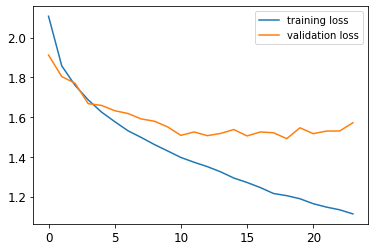

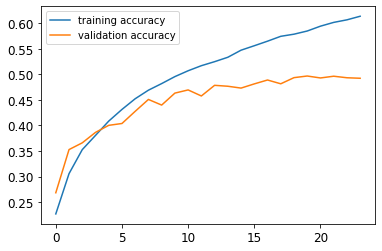

In [11]:
##
# Visualize the results
#

import matplotlib.pyplot as plt

## Plot loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss', 'validation loss'])
plt.title('SELU')

## Plot accuracy
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training accuracy', 'validation accuracy'])

In [13]:
##
# Tune the model's hyperparameters
# Just tune learning_rate

from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

## Hyperparameter distributions
param_distribs = {
    "learning_rate": reciprocal(3e-4, 3e-2),
    #"layer_size": [60, 80, 100, 120],
    #"hidden_layers": [15, 20, 25],
    #"beta_1": [0.9, 0.99, 0.999],
    #"beta_2": [0.9, 0.99, 0.999]
}

## Define hyperparameter tuner
tuner = RandomizedSearchCV(
    KerasClassifier(build_model),
    param_distribs,
    n_iter=2,
    cv=2,
    verbose=2
)

## Tune the hyperparameters
tuner.fit(
    X_train,
    y_train,
    epochs=50,
    validation_data=(X_valid, y_valid),
    callbacks=[
        keras.callbacks.EarlyStopping(patience=5)
    ]
)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] learning_rate=0.001683454924600351 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train on 22500 samples, validate on 5000 samples
Epoch 1/50
22500/22500 [==============================] - 8s 360us/sample - loss: 2.2474 - accuracy: 0.1538 - val_loss: 2.1195 - val_accuracy: 0.1860
Epoch 2/50
22500/22500 [==============================] - 6s 247us/sample - loss: 2.0498 - accuracy: 0.2217 - val_loss: 1.9817 - val_accuracy: 0.2526
Epoch 3/50
22500/22500 [==============================] - 5s 244us/sample - loss: 1.9769 - accuracy: 0.2521 - val_loss: 1.9634 - val_accuracy: 0.2624
Epoch 4/50
22500/22500 [==============================] - 6s 247us/sample - loss: 1.9303 - accuracy: 0.2782 - val_loss: 1.8943 - val_accuracy: 0.3012
Epoch 5/50
22500/22500 [==============================] - 6s 248us/sample - loss: 1.8788 - accuracy: 0.2965 - val_loss: 1.9080 - val_accuracy: 0.2798
Epoch 6/50
22500/22500 [==============================] - 6s 246us/sample - loss: 1.8485 - accuracy: 0.3120 - val_loss: 1.8154 - val_accuracy: 0.3440
Epoch 7/50
22500/22500 [===========================

[CV] ............... learning_rate=0.001683454924600351, total= 2.9min
[CV] learning_rate=0.001683454924600351 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.9min remaining:    0.0s


Train on 22500 samples, validate on 5000 samples
Epoch 1/50
22500/22500 [==============================] - 8s 360us/sample - loss: 2.2090 - accuracy: 0.1616 - val_loss: 2.1541 - val_accuracy: 0.1608
Epoch 2/50
22500/22500 [==============================] - 5s 241us/sample - loss: 2.0155 - accuracy: 0.2424 - val_loss: 2.0724 - val_accuracy: 0.2050
Epoch 3/50
22500/22500 [==============================] - 5s 240us/sample - loss: 1.9174 - accuracy: 0.2942 - val_loss: 1.8730 - val_accuracy: 0.3232
Epoch 4/50
22500/22500 [==============================] - 5s 241us/sample - loss: 1.8565 - accuracy: 0.3171 - val_loss: 1.8670 - val_accuracy: 0.3196
Epoch 5/50
22500/22500 [==============================] - 5s 239us/sample - loss: 1.8161 - accuracy: 0.3388 - val_loss: 1.7824 - val_accuracy: 0.3680
Epoch 6/50
22500/22500 [==============================] - 5s 242us/sample - loss: 1.7705 - accuracy: 0.3594 - val_loss: 1.7545 - val_accuracy: 0.3634
Epoch 7/50
22500/22500 [===========================

[CV] ............... learning_rate=0.001683454924600351, total= 3.4min
[CV] learning_rate=0.02390836445593178 ...............................
Train on 22500 samples, validate on 5000 samples
Epoch 1/50
22500/22500 [==============================] - 8s 345us/sample - loss: 7.0935 - accuracy: 0.1231 - val_loss: 2.2865 - val_accuracy: 0.1372
Epoch 2/50
22500/22500 [==============================] - 5s 244us/sample - loss: 2.1724 - accuracy: 0.1706 - val_loss: 2.1999 - val_accuracy: 0.1702
Epoch 3/50
22500/22500 [==============================] - 6s 248us/sample - loss: 2.1115 - accuracy: 0.1853 - val_loss: 2.0406 - val_accuracy: 0.2206
Epoch 4/50
22500/22500 [==============================] - 5s 243us/sample - loss: 2.0778 - accuracy: 0.2032 - val_loss: 2.0435 - val_accuracy: 0.2200
Epoch 5/50
22500/22500 [==============================] - 5s 244us/sample - loss: 2.0392 - accuracy: 0.2205 - val_loss: 2.0344 - val_accuracy: 0.2264
Epoch 6/50
22500/22500 [==============================] - 6

[CV] ................ learning_rate=0.02390836445593178, total= 1.2min
[CV] learning_rate=0.02390836445593178 ...............................
Train on 22500 samples, validate on 5000 samples
Epoch 1/50
22500/22500 [==============================] - 8s 346us/sample - loss: 6.1888 - accuracy: 0.1426 - val_loss: 2.1847 - val_accuracy: 0.1576
Epoch 2/50
22500/22500 [==============================] - 6s 247us/sample - loss: 2.1153 - accuracy: 0.1817 - val_loss: 2.1554 - val_accuracy: 0.1768
Epoch 3/50
22500/22500 [==============================] - 6s 251us/sample - loss: 2.0856 - accuracy: 0.1903 - val_loss: 2.0679 - val_accuracy: 0.2072
Epoch 4/50
22500/22500 [==============================] - 6s 245us/sample - loss: 2.0623 - accuracy: 0.1997 - val_loss: 2.0530 - val_accuracy: 0.2084
Epoch 5/50
22500/22500 [==============================] - 5s 244us/sample - loss: 2.0525 - accuracy: 0.2049 - val_loss: 2.0328 - val_accuracy: 0.2172
Epoch 6/50
22500/22500 [==============================] - 6

[CV] ................ learning_rate=0.02390836445593178, total= 2.9min


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 10.4min finished


Train on 45000 samples, validate on 5000 samples
Epoch 1/50
45000/45000 [==============================] - 13s 284us/sample - loss: 2.1769 - accuracy: 0.1696 - val_loss: 2.0271 - val_accuracy: 0.1970
Epoch 2/50
45000/45000 [==============================] - 10s 233us/sample - loss: 1.9842 - accuracy: 0.2407 - val_loss: 1.9222 - val_accuracy: 0.2586
Epoch 3/50
45000/45000 [==============================] - 11s 235us/sample - loss: 1.9132 - accuracy: 0.2710 - val_loss: 1.9452 - val_accuracy: 0.2592
Epoch 4/50
45000/45000 [==============================] - 10s 232us/sample - loss: 1.8527 - accuracy: 0.3107 - val_loss: 1.7974 - val_accuracy: 0.3356
Epoch 5/50
45000/45000 [==============================] - 11s 234us/sample - loss: 1.7786 - accuracy: 0.3514 - val_loss: 1.7800 - val_accuracy: 0.3548
Epoch 6/50
45000/45000 [==============================] - 11s 235us/sample - loss: 1.7257 - accuracy: 0.3749 - val_loss: 1.6947 - val_accuracy: 0.3836
Epoch 7/50
45000/45000 [=====================

RandomizedSearchCV(cv=2, error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000018E72535908>,
                   iid='warn', n_iter=2, n_jobs=None,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018E72535E08>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [14]:
##
# Print out the best parameters
#

print("Best params:")
print(tuner.best_params_)

print("Best score: " + str(tuner.best_score_))

# tuner.best_estimator_


Best params:
{'learning_rate': 0.001683454924600351}
Best score: 0.4592444449663162
